In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.getcwd()


'/home/jupyter'

Algorithms to try - 
- Logistic regression (base model)
- KNN
- Naive Bayes
- Decision trees
- Gradient Boosted Trees
- Random Forests
- Adaboost / XGboost / Catboost
- ANN

### Loading data (for now dummy data)

In [3]:
data = pd.read_csv('churn&cluster_v2_04_02.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705094 entries, 0 to 1705093
Data columns (total 53 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   Unnamed: 0                       int64  
 1   customer_id                      object 
 2   avg_time_btw_orders              float64
 3   recency                          float64
 4   months_elapsed                   float64
 5   purchase_times                   float64
 6   lifetime_spent                   float64
 7   lifetime_quantity                float64
 8   per_order_spent                  float64
 9   per_order_quantity               float64
 10  distinct_category_count          float64
 11  discount_frequency_order         float64
 12  discount_frequency_product       float64
 13  outdoor_equipment_pct            float64
 14  cargo_pct                        float64
 15  soft_cooler_pct                  float64
 16  bags_pct                         float64
 17  drinkwar

In [5]:
data = data.iloc[:,1:]
data

,customer_id,avg_time_btw_orders,recency,months_elapsed,purchase_times,lifetime_spent,lifetime_quantity,per_order_spent,per_order_quantity,distinct_category_count,...,unsubscribed_2.0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,churn,cluster
0,b32e89d5-a934-4d77-8b86-e01bf270fce6,7.837500,20.833333,83.700000,9.0,816.61,39.0,90.734444,4.333333,2.0,...,0.0,-0.102914,1.505924,0.398443,2.709282,-1.011985,-0.508614,-0.066343,1.0,2
1,20a5cbb9-216a-4bfb-84f8-34316cc990f0,12.733333,26.333333,64.566667,4.0,722.32,18.0,180.580000,4.500000,2.0,...,0.0,-0.512081,1.299558,0.681338,1.635165,-0.151371,0.037061,-0.139124,1.0,2
2,564fd988-bc35-475f-b7f6-da04ae474422,6.420000,23.900000,56.066667,6.0,720.85,21.0,120.141667,3.500000,4.0,...,0.0,0.749201,0.052160,-0.022346,0.646708,-1.665469,-0.293647,0.066681,1.0,4
3,e6867db2-26c5-4841-8822-863bce76f5b0,7.670833,7.800000,69.266667,9.0,544.85,32.0,60.538889,3.555556,3.0,...,0.0,1.052310,-0.372679,-0.997128,0.550147,-2.128886,-0.185418,0.343730,1.0,4
4,36a6c5a8-955a-457e-8509-83b7e0644856,6.733333,3.433333,23.666667,4.0,764.96,17.0,191.240000,4.250000,4.0,...,0.0,0.848796,-0.366551,0.289700,0.049042,-0.342653,1.082833,-0.866388,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705089,a7ad3e73-d8aa-4bfd-b829-f97a6574fad4,5.741667,28.233333,51.300000,5.0,179.94,7.0,35.988000,1.400000,2.0,...,0.0,-0.907078,0.494255,-0.225354,1.057391,-0.368429,-0.187121,-0.051807,1.0,2
1705090,1cb47d1e-ead0-4432-8d40-53ce0d3df887,20.833333,3.333333,86.700000,5.0,640.96,7.0,128.192000,1.400000,2.0,...,0.0,-0.542674,0.710010,1.031210,2.161493,-0.638285,-0.965893,0.132074,0.0,2
1705091,3973bf5a-f1db-4a38-8ffb-bfd8a46a5027,6.120000,28.300000,58.966667,6.0,344.82,21.0,57.470000,3.500000,2.0,...,0.0,-0.436925,0.621915,-0.455001,1.319155,-0.394666,-0.265996,-0.046920,1.0,2
1705092,902a88ec-2eee-444f-a524-c7f0e5f5c3bc,9.366667,16.300000,35.066667,3.0,204.93,7.0,68.310000,2.333333,2.0,...,0.0,-1.148232,0.930564,0.353656,0.411127,-0.168640,0.025685,-0.018823,NaN,2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705094 entries, 0 to 1705093
Data columns (total 52 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   customer_id                      object 
 1   avg_time_btw_orders              float64
 2   recency                          float64
 3   months_elapsed                   float64
 4   purchase_times                   float64
 5   lifetime_spent                   float64
 6   lifetime_quantity                float64
 7   per_order_spent                  float64
 8   per_order_quantity               float64
 9   distinct_category_count          float64
 10  discount_frequency_order         float64
 11  discount_frequency_product       float64
 12  outdoor_equipment_pct            float64
 13  cargo_pct                        float64
 14  soft_cooler_pct                  float64
 15  bags_pct                         float64
 16  drinkware_pct                    float64
 17  hard_coo

In [7]:
data.isna().sum()

customer_id                             0
avg_time_btw_orders                     0
recency                                 0
months_elapsed                          0
purchase_times                          0
lifetime_spent                          0
lifetime_quantity                       0
per_order_spent                         0
per_order_quantity                      0
distinct_category_count                 0
discount_frequency_order                0
discount_frequency_product              0
outdoor_equipment_pct                   0
cargo_pct                               0
soft_cooler_pct                         0
bags_pct                                0
drinkware_pct                           0
hard_cooler_pct                         0
other_pct                               0
black_pct                               0
white_pct                               0
navy_pct                                0
seaform_pct                             0
stainless_pct                     

In [8]:
data.dropna(inplace = True)

In [9]:
#Seeing how the churn variable categories distribution look like
data['churn'].value_counts()

1.0    846565
0.0    669633
Name: churn, dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1516198 entries, 0 to 1705093
Data columns (total 52 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   customer_id                      1516198 non-null  object 
 1   avg_time_btw_orders              1516198 non-null  float64
 2   recency                          1516198 non-null  float64
 3   months_elapsed                   1516198 non-null  float64
 4   purchase_times                   1516198 non-null  float64
 5   lifetime_spent                   1516198 non-null  float64
 6   lifetime_quantity                1516198 non-null  float64
 7   per_order_spent                  1516198 non-null  float64
 8   per_order_quantity               1516198 non-null  float64
 9   distinct_category_count          1516198 non-null  float64
 10  discount_frequency_order         1516198 non-null  float64
 11  discount_frequency_product       1516198 non-null 

##### Now our data is of 1.5M rows. We'll do a train test split and then try out different models

### Data Prep for modelling

In [11]:
#Splitting data into X and Y
data_x = data.iloc[:,3:43]
data_y = data.iloc[:,-2]
data_x

,months_elapsed,purchase_times,lifetime_spent,lifetime_quantity,per_order_spent,per_order_quantity,distinct_category_count,discount_frequency_order,discount_frequency_product,outdoor_equipment_pct,...,customizer_completed_count,cart_viewed_count,checkout_started_count,order_cancelled_count,email_received,email_open_rate,max_entry_product_price,unsubscribed_0.0,unsubscribed_1.0,unsubscribed_2.0
0,83.700000,9.0,816.61,39.0,90.734444,4.333333,2.0,0.000000,0.000000,0.000000,...,0.0,4.0,2.0,0.0,14190.0,0.765328,29.99,1.0,0.0,0.0
1,64.566667,4.0,722.32,18.0,180.580000,4.500000,2.0,0.000000,0.000000,0.000000,...,0.0,0.0,1.0,0.0,3936.0,0.530488,18.74,1.0,0.0,0.0
2,56.066667,6.0,720.85,21.0,120.141667,3.500000,4.0,0.166667,0.095238,0.047619,...,2.0,7.0,8.0,0.0,9975.0,0.093333,22.49,1.0,0.0,0.0
3,69.266667,9.0,544.85,32.0,60.538889,3.555556,3.0,0.333333,0.375000,0.125000,...,3.0,12.0,8.0,0.0,13416.0,0.374031,10.00,1.0,0.0,0.0
4,23.666667,4.0,764.96,17.0,191.240000,4.250000,4.0,0.250000,0.117647,0.000000,...,0.0,25.0,8.0,0.0,5525.0,0.409231,30.00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705088,31.866667,6.0,426.18,7.0,71.030000,1.166667,2.0,0.000000,0.000000,0.000000,...,0.0,3.0,7.0,0.0,3612.0,0.341085,275.00,1.0,0.0,0.0
1705089,51.300000,5.0,179.94,7.0,35.988000,1.400000,2.0,0.200000,0.142857,0.000000,...,2.0,6.0,3.0,0.0,2694.0,0.322940,35.00,1.0,0.0,0.0
1705090,86.700000,5.0,640.96,7.0,128.192000,1.400000,2.0,0.000000,0.000000,0.000000,...,0.0,9.0,6.0,0.0,2958.0,0.638945,34.99,1.0,0.0,0.0
1705091,58.966667,6.0,344.82,21.0,57.470000,3.500000,2.0,0.333333,0.142857,0.000000,...,2.0,3.0,1.0,0.0,10311.0,0.621181,38.00,1.0,0.0,0.0


### Train Test Split

In [15]:
#importing libraries
from sklearn.model_selection import train_test_split

In [16]:
# Cluster 0 data
data_c0 = data[data['cluster'] == 0]
data_x_c0 = data_c0.iloc[:,3:43]
data_y_c0 = data_c0.iloc[:,-2]
X_train_c0, X_test_c0, y_train_c0, y_test_c0 = train_test_split(data_x_c0, data_y_c0, test_size=0.25, random_state=100)

# Cluster 1 data
data_c1 = data[data['cluster'] == 1]
data_x_c1 = data_c1.iloc[:,3:43]
data_y_c1 = data_c1.iloc[:,-2]
X_train_c1, X_test_c1, y_train_c1, y_test_c1 = train_test_split(data_x_c1, data_y_c1, test_size=0.25, random_state=100)

# Cluster 2 data
data_c2 = data[data['cluster'] == 2]
data_x_c2 = data_c2.iloc[:,3:43]
data_y_c2 = data_c2.iloc[:,-2]
X_train_c2, X_test_c2, y_train_c2, y_test_c2 = train_test_split(data_x_c2, data_y_c2, test_size=0.25, random_state=100)

# Cluster 3 data
data_c3 = data[data['cluster'] == 3]
data_x_c3 = data_c3.iloc[:,3:43]
data_y_c3 = data_c3.iloc[:,-2]
X_train_c3, X_test_c3, y_train_c3, y_test_c3 = train_test_split(data_x_c3, data_y_c3, test_size=0.25, random_state=100)

# Cluster 4 data
data_c4 = data[data['cluster'] == 4]
data_x_c4 = data_c4.iloc[:,3:43]
data_y_c4 = data_c4.iloc[:,-2]
X_train_c4, X_test_c4, y_train_c4, y_test_c4 = train_test_split(data_x_c4, data_y_c4, test_size=0.25, random_state=100)

# Cluster 5 data
data_c5 = data[data['cluster'] == 5]
data_x_c5 = data_c5.iloc[:,3:43]
data_y_c5 = data_c5.iloc[:,-2]
X_train_c5, X_test_c5, y_train_c5, y_test_c5 = train_test_split(data_x_c5, data_y_c5, test_size=0.25, random_state=100)

# Cluster 6 data
data_c6 = data[data['cluster'] == 6]
data_x_c6 = data_c6.iloc[:,3:43]
data_y_c6 = data_c6.iloc[:,-2]
X_train_c6, X_test_c6, y_train_c6, y_test_c6 = train_test_split(data_x_c6, data_y_c6, test_size=0.25, random_state=100)

# Cluster 7 data
data_c7 = data[data['cluster'] == 7]
data_x_c7 = data_c7.iloc[:,3:43]
data_y_c7 = data_c7.iloc[:,-2]
X_train_c7, X_test_c7, y_train_c7, y_test_c7 = train_test_split(data_x_c6, data_y_c6, test_size=0.25, random_state=100)

In [13]:
#importing libraries
from sklearn.model_selection import train_test_split
#Doing a 75-25 training - testing split on entire data
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=100)

In [19]:
#Percentage of churned class vs non-churned class
y_train.value_counts().to_list()[0]/len(y_train)

0.558560539173441

##### This is a fairly balanced dataset. No need for oversampling

### Importing libraries for modeling

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

### Logistic Regression

In [21]:
#Creating instance of model
log_reg_model = LogisticRegression(max_iter = 20000)

In [ ]:
#fitting the model
log_reg_model.fit(X_train,y_train)

In [20]:
log_reg_model.intercept_
log_reg_model.coef_

array([[-9.68823352e-01,  2.26048666e+00,  5.29774288e-02,
        -1.05173846e-01,  8.99799038e-05, -5.17440414e-03,
        -1.13372366e-03,  2.86043979e-02, -1.75022208e-01,
        -9.89398850e-02, -1.23727262e-01, -3.29802741e-01,
        -1.92457112e-01, -6.83701375e-01, -5.78806556e-01,
        -2.35057879e+00, -1.01077056e+00, -1.75321803e+00,
        -9.95135616e-01, -8.22088401e-01, -7.62641804e-01,
        -4.46455540e-01, -4.52298909e-01, -9.62114217e-01,
        -8.25363102e-01,  4.27214940e-01, -1.02082019e+00,
        -1.01108306e+00,  5.56284598e-03, -1.11467006e-02,
         2.69846708e-04,  9.61946592e-03,  6.34530730e-03,
        -1.07232164e-02,  1.09744985e-02,  2.05791623e-02,
         3.24675711e-06, -1.67943224e-01, -1.62288179e-03,
        -2.05252128e+00, -1.93499654e+00, -2.91222660e+00]])

In [21]:
X_train

,avg_time_btw_orders,recency,months_elapsed,purchase_times,lifetime_spent,lifetime_quantity,per_order_spent,per_order_quantity,distinct_category_count,discount_frequency_order,...,customizer_completed_count,cart_viewed_count,checkout_started_count,order_cancelled_count,email_received,email_open_rate,max_entry_product_price,unsubscribed_0.0,unsubscribed_1.0,unsubscribed_2.0
1639664,9.577778,6.200000,34.966667,4.0,144.97,7.0,36.242500,1.75,2.0,0.00,...,2.0,7.0,6.0,0.0,427.0,0.147541,35.00,1.0,0.0,0.0
1632253,7.400000,14.033333,36.300000,4.0,303.68,11.0,75.920000,2.75,3.0,0.50,...,0.0,3.0,2.0,0.0,5643.0,0.592593,40.00,1.0,0.0,0.0
270314,7.333333,5.166667,27.233333,4.0,223.99,8.0,55.997500,2.00,2.0,0.00,...,0.0,22.0,11.0,0.0,3276.0,0.472222,22.49,0.0,1.0,0.0
1145284,11.600000,39.900000,51.500000,2.0,2109.30,111.0,1054.650000,55.50,2.0,0.00,...,0.0,0.0,0.0,0.0,1920.0,0.543750,35.00,1.0,0.0,0.0
16496,15.788889,9.433333,56.833333,4.0,549.04,29.0,137.260000,7.25,2.0,0.25,...,0.0,22.0,5.0,0.0,5346.0,0.804527,18.74,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233109,12.833333,2.666667,15.500000,2.0,380.99,4.0,190.495000,2.00,3.0,1.00,...,1.0,6.0,5.0,0.0,1004.0,0.577689,20.00,0.0,1.0,0.0
70032,36.633333,2.900000,39.533333,2.0,659.92,12.0,329.960000,6.00,2.0,1.00,...,0.0,1.0,0.0,0.0,0.0,0.426932,22.49,0.0,0.0,1.0
968984,0.500000,7.633333,8.666667,3.0,140.00,9.0,46.666667,3.00,2.0,0.00,...,0.0,43.0,8.0,0.0,0.0,0.426932,30.00,0.0,0.0,1.0
230628,13.177778,2.300000,41.866667,4.0,139.97,8.0,34.992500,2.00,2.0,0.25,...,0.0,1.0,1.0,0.0,4128.0,0.096899,35.00,1.0,0.0,0.0


In [23]:
#Predicting on test
log_reg_y_test_pred = log_reg_model.predict(X_test)

In [24]:
print('Accuracy on train data: ',accuracy_score(y_train,log_reg_model.predict(X_train)))
print('Accuracy on test data: ',accuracy_score(y_test,log_reg_y_test_pred))

Accuracy on train data:  0.9754350357209439
Accuracy on test data:  0.9755441234665612


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[ 91651,    260],
       [   297, 122839]])

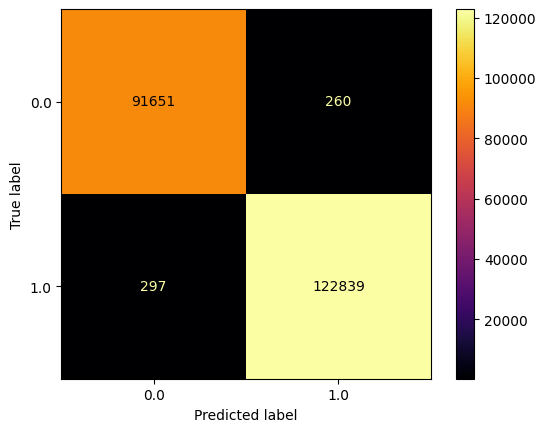

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,cmap = 'inferno')

Precision:  0.9978066434333341
Recall:  0.9975068217255717


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


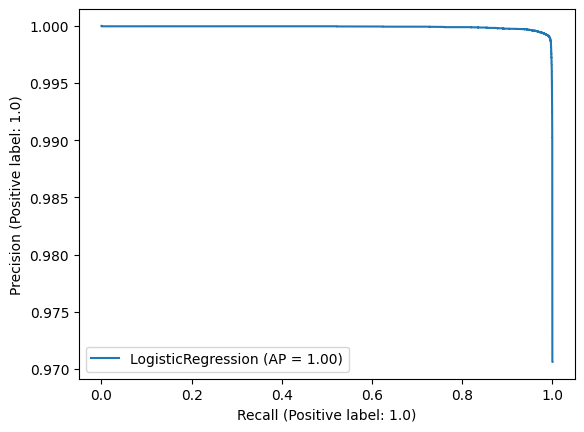

In [ ]:
#calculating precision and reall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)
 
#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(log_reg_model, X_test, y_test)

### Random Forest Classifier

In [18]:
rf = RandomForestClassifier()

In [22]:
#Fitting logistic regression for each cluster - 
#Cluster 0
rf.fit(X_train_c0, y_train_c0)
rf_y_test_pred_c0 = rf.predict(X_test_c0)
print('\nAccuracy Metric for Cluster 0-')
print('Accuracy on train data: ',accuracy_score(y_train_c0,rf.predict(X_train_c0)))
print('Accuracy on test data: ',accuracy_score(y_test_c0,rf_y_test_pred_c0))

#Cluster 1
rf.fit(X_train_c1, y_train_c1)
rf_y_test_pred_c1 = rf.predict(X_test_c1)
print('\nAccuracy Metric for Cluster 1-\n') 
print('Accuracy on train data: ',accuracy_score(y_train_c1,rf.predict(X_train_c1)))
print('Accuracy on test data: ',accuracy_score(y_test_c1,rf_y_test_pred_c1))

#Cluster 2
rf.fit(X_train_c2, y_train_c2)
rf_y_test_pred_c2 = rf.predict(X_test_c2)
print('\nAccuracy Metric for Cluster 2-\n')
print('Accuracy on train data: ',accuracy_score(y_train_c2,rf.predict(X_train_c2)))
print('Accuracy on test data: ',accuracy_score(y_test_c2,rf_y_test_pred_c2))

#Cluster 3
rf.fit(X_train_c3, y_train_c3)
rf_y_test_pred_c3 = rf.predict(X_test_c3)
print('\nAccuracy Metric for Cluster 3-\n')
print('Accuracy on train data: ',accuracy_score(y_train_c3,rf.predict(X_train_c3)))
print('Accuracy on test data: ',accuracy_score(y_test_c3,rf_y_test_pred_c3))

#Cluster 4
rf.fit(X_train_c4, y_train_c4)
rf_y_test_pred_c4 = rf.predict(X_test_c4)
print('\nAccuracy Metric for Cluster 4-\n')
print('Accuracy on train data: ',accuracy_score(y_train_c4,rf.predict(X_train_c4)))
print('Accuracy on test data: ',accuracy_score(y_test_c4,rf_y_test_pred_c4))

#Cluster 5
rf.fit(X_train_c5, y_train_c5)
rf_y_test_pred_c5 = rf.predict(X_test_c5)
print('\nAccuracy Metric for Cluster 5-\n') 
print('Accuracy on train data: ',accuracy_score(y_train_c5,rf.predict(X_train_c5)))
print('Accuracy on test data: ',accuracy_score(y_test_c5,rf_y_test_pred_c5))

#Cluster 6
rf.fit(X_train_c6, y_train_c6)
rf_y_test_pred_c6 = rf.predict(X_test_c6)
print('\nAccuracy Metric for Cluster 6-\n') 
print('Accuracy on train data: ',accuracy_score(y_train_c6,rf.predict(X_train_c6)))
print('Accuracy on test data: ',accuracy_score(y_test_c6,rf_y_test_pred_c6))

#Cluster 7
rf.fit(X_train_c7, y_train_c7)
rf_y_test_pred_c7 = rf.predict(X_test_c7)
print('\nAccuracy Metric for Cluster 7-\n')
print('Accuracy on train data: ',accuracy_score(y_train_c7,rf.predict(X_train_c7)))
print('Accuracy on test data: ',accuracy_score(y_test_c7,rf_y_test_pred_c7))


Accuracy Metric for Cluster 0-
Accuracy on train data:  1.0
Accuracy on test data:  0.7581113162753891

Accuracy Metric for Cluster 1-

Accuracy on train data:  1.0
Accuracy on test data:  0.802489976788352

Accuracy Metric for Cluster 2-

Accuracy on train data:  0.9999904358693157
Accuracy on test data:  0.8147248417146464

Accuracy Metric for Cluster 3-

Accuracy on train data:  1.0
Accuracy on test data:  0.7819403918299291

Accuracy Metric for Cluster 4-

Accuracy on train data:  0.9999952016966801
Accuracy on test data:  0.8062733017604975

Accuracy Metric for Cluster 5-

Accuracy on train data:  1.0
Accuracy on test data:  0.7605671482075976

Accuracy Metric for Cluster 6-

Accuracy on train data:  0.9999893614757761
Accuracy on test data:  0.8162959180416813

Accuracy Metric for Cluster 7-

Accuracy on train data:  0.999994680737888
Accuracy on test data:  0.815753359078288


In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
rf_y_test_pred = rf.predict(X_test)

In [ ]:
print('Accuracy on train data: ',accuracy_score(y_train,rf.predict(X_train)))
print('Accuracy on test data: ',accuracy_score(y_test,rf_y_test_pred))

Accuracy on train data:  1.0
Accuracy on test data:  0.9984515012997158


##### Random forest is kind of overfitting

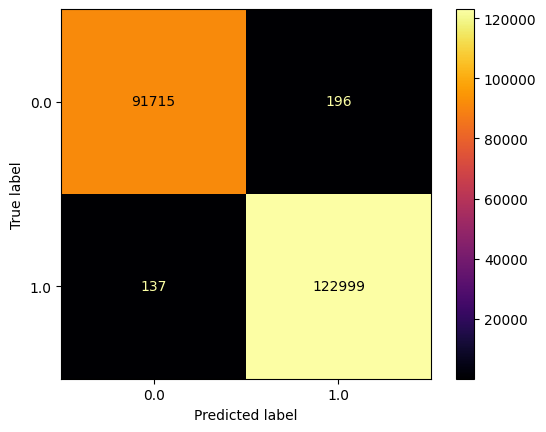

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_test_pred,cmap = 'inferno')

##### Let's look at the feature importance plot

<BarContainer object of 42 artists>

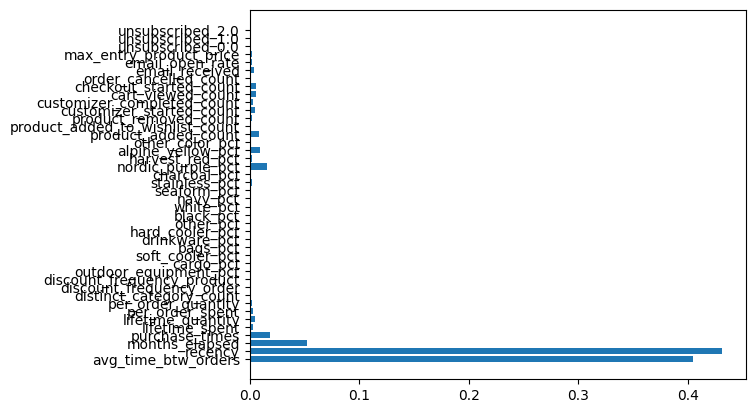

In [ ]:
plt.barh(X_train.columns, rf.feature_importances_)

##### Hyperparameter tuning for Random Forest

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [5,10,15,20],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
os.getcwd()

'/home/jupyter'

Algorithms to try - 
- Logistic regression (base model)
- KNN
- Naive Bayes
- Decision trees
- Gradient Boosted Trees
- Random Forests
- Adaboost / XGboost / Catboost
- ANN

### Loading data (for now dummy data)

In [ ]:
data.head()

,Unnamed: 0,customer_id,avg_time_btw_orders,recency,months_elapsed,purchase_times,lifetime_spent,lifetime_quantity,per_order_spent,per_order_quantity,...,unsubscribed_2.0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,churn,cluster
0,0,b32e89d5-a934-4d77-8b86-e01bf270fce6,7.837500,20.833333,83.700000,9.0,816.61,39.0,90.734444,4.333333,...,0.0,-0.102914,1.505924,0.398443,2.709282,-1.011985,-0.508614,-0.066343,1.0,2
1,1,20a5cbb9-216a-4bfb-84f8-34316cc990f0,12.733333,26.333333,64.566667,4.0,722.32,18.0,180.580000,4.500000,...,0.0,-0.512081,1.299558,0.681338,1.635165,-0.151371,0.037061,-0.139124,1.0,2
2,2,564fd988-bc35-475f-b7f6-da04ae474422,6.420000,23.900000,56.066667,6.0,720.85,21.0,120.141667,3.500000,...,0.0,0.749201,0.052160,-0.022346,0.646708,-1.665469,-0.293647,0.066681,1.0,4
3,3,e6867db2-26c5-4841-8822-863bce76f5b0,7.670833,7.800000,69.266667,9.0,544.85,32.0,60.538889,3.555556,...,0.0,1.052310,-0.372679,-0.997128,0.550147,-2.128886,-0.185418,0.343730,NaN,4
4,4,36a6c5a8-955a-457e-8509-83b7e0644856,6.733333,3.433333,23.666667,4.0,764.96,17.0,191.240000,4.250000,...,0.0,0.848796,-0.366551,0.289700,0.049042,-0.342653,1.082833,-0.866388,NaN,4


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
os.getcwd()

'/home/jupyter'

Algorithms to try - 
- Logistic regression (base model)
- KNN
- Naive Bayes
- Decision trees
- Gradient Boosted Trees
- Random Forests
- Adaboost / XGboost / Catboost
- ANN

### Loading data (for now dummy data)

In [ ]:
data = pd.read_csv('churn&cluster_03_29_23.csv')

In [ ]:
data.head()

,Unnamed: 0,customer_id,avg_time_btw_orders,recency,months_elapsed,purchase_times,lifetime_spent,lifetime_quantity,per_order_spent,per_order_quantity,...,unsubscribed_2.0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,churn,cluster
0,0,b32e89d5-a934-4d77-8b86-e01bf270fce6,7.837500,20.833333,83.700000,9.0,816.61,39.0,90.734444,4.333333,...,0.0,-0.102914,1.505924,0.398443,2.709282,-1.011985,-0.508614,-0.066343,1.0,2
1,1,20a5cbb9-216a-4bfb-84f8-34316cc990f0,12.733333,26.333333,64.566667,4.0,722.32,18.0,180.580000,4.500000,...,0.0,-0.512081,1.299558,0.681338,1.635165,-0.151371,0.037061,-0.139124,1.0,2
2,2,564fd988-bc35-475f-b7f6-da04ae474422,6.420000,23.900000,56.066667,6.0,720.85,21.0,120.141667,3.500000,...,0.0,0.749201,0.052160,-0.022346,0.646708,-1.665469,-0.293647,0.066681,1.0,4
3,3,e6867db2-26c5-4841-8822-863bce76f5b0,7.670833,7.800000,69.266667,9.0,544.85,32.0,60.538889,3.555556,...,0.0,1.052310,-0.372679,-0.997128,0.550147,-2.128886,-0.185418,0.343730,NaN,4
4,4,36a6c5a8-955a-457e-8509-83b7e0644856,6.733333,3.433333,23.666667,4.0,764.96,17.0,191.240000,4.250000,...,0.0,0.848796,-0.366551,0.289700,0.049042,-0.342653,1.082833,-0.866388,NaN,4


In [ ]:
data = data.iloc[:,1:]
data

,customer_id,avg_time_btw_orders,recency,months_elapsed,purchase_times,lifetime_spent,lifetime_quantity,per_order_spent,per_order_quantity,distinct_category_count,...,unsubscribed_2.0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,churn,cluster
0,b32e89d5-a934-4d77-8b86-e01bf270fce6,7.837500,20.833333,83.700000,9.0,816.61,39.0,90.734444,4.333333,2.0,...,0.0,-0.102914,1.505924,0.398443,2.709282,-1.011985,-0.508614,-0.066343,1.0,2
1,20a5cbb9-216a-4bfb-84f8-34316cc990f0,12.733333,26.333333,64.566667,4.0,722.32,18.0,180.580000,4.500000,2.0,...,0.0,-0.512081,1.299558,0.681338,1.635165,-0.151371,0.037061,-0.139124,1.0,2
2,564fd988-bc35-475f-b7f6-da04ae474422,6.420000,23.900000,56.066667,6.0,720.85,21.0,120.141667,3.500000,4.0,...,0.0,0.749201,0.052160,-0.022346,0.646708,-1.665469,-0.293647,0.066681,1.0,4
3,e6867db2-26c5-4841-8822-863bce76f5b0,7.670833,7.800000,69.266667,9.0,544.85,32.0,60.538889,3.555556,3.0,...,0.0,1.052310,-0.372679,-0.997128,0.550147,-2.128886,-0.185418,0.343730,NaN,4
4,36a6c5a8-955a-457e-8509-83b7e0644856,6.733333,3.433333,23.666667,4.0,764.96,17.0,191.240000,4.250000,4.0,...,0.0,0.848796,-0.366551,0.289700,0.049042,-0.342653,1.082833,-0.866388,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705089,a7ad3e73-d8aa-4bfd-b829-f97a6574fad4,5.741667,28.233333,51.300000,5.0,179.94,7.0,35.988000,1.400000,2.0,...,0.0,-0.907078,0.494255,-0.225354,1.057391,-0.368429,-0.187121,-0.051807,1.0,2
1705090,1cb47d1e-ead0-4432-8d40-53ce0d3df887,20.833333,3.333333,86.700000,5.0,640.96,7.0,128.192000,1.400000,2.0,...,0.0,-0.542674,0.710010,1.031210,2.161493,-0.638285,-0.965893,0.132074,0.0,2
1705091,3973bf5a-f1db-4a38-8ffb-bfd8a46a5027,6.120000,28.300000,58.966667,6.0,344.82,21.0,57.470000,3.500000,2.0,...,0.0,-0.436925,0.621915,-0.455001,1.319155,-0.394666,-0.265996,-0.046920,1.0,2
1705092,902a88ec-2eee-444f-a524-c7f0e5f5c3bc,9.366667,16.300000,35.066667,3.0,204.93,7.0,68.310000,2.333333,2.0,...,0.0,-1.148232,0.930564,0.353656,0.411127,-0.168640,0.025685,-0.018823,NaN,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1705094 entries, 0 to 1705093
Data columns (total 52 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   customer_id                      object 
 1   avg_time_btw_orders              float64
 2   recency                          float64
 3   months_elapsed                   float64
 4   purchase_times                   float64
 5   lifetime_spent                   float64
 6   lifetime_quantity                float64
 7   per_order_spent                  float64
 8   per_order_quantity               float64
 9   distinct_category_count          float64
 10  discount_frequency_order         float64
 11  discount_frequency_product       float64
 12  outdoor_equipment_pct            float64
 13  cargo_pct                        float64
 14  soft_cooler_pct                  float64
 15  bags_pct                         float64
 16  drinkware_pct                    float64
 17  hard_coo

In [ ]:
data.isna().sum()

customer_id                             0
avg_time_btw_orders                     0
recency                                 0
months_elapsed                          0
purchase_times                          0
lifetime_spent                          0
lifetime_quantity                       0
per_order_spent                         0
per_order_quantity                      0
distinct_category_count                 0
discount_frequency_order                0
discount_frequency_product              0
outdoor_equipment_pct                   0
cargo_pct                               0
soft_cooler_pct                         0
bags_pct                                0
drinkware_pct                           0
hard_cooler_pct                         0
other_pct                               0
black_pct                               0
white_pct                               0
navy_pct                                0
seaform_pct                             0
stainless_pct                     

##### 'Churn' column has 844908 NaNs. We can't assign a clear cut churn or no churn to them. Hence, we'll exclude those out when modelling

In [ ]:
data.dropna(inplace = True)

In [ ]:
#Seeing how the churn variable categories distribution look like
data['churn'].value_counts()

1.0    492428
0.0    367758
Name: churn, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 860186 entries, 0 to 1705093
Data columns (total 52 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   customer_id                      860186 non-null  object 
 1   avg_time_btw_orders              860186 non-null  float64
 2   recency                          860186 non-null  float64
 3   months_elapsed                   860186 non-null  float64
 4   purchase_times                   860186 non-null  float64
 5   lifetime_spent                   860186 non-null  float64
 6   lifetime_quantity                860186 non-null  float64
 7   per_order_spent                  860186 non-null  float64
 8   per_order_quantity               860186 non-null  float64
 9   distinct_category_count          860186 non-null  float64
 10  discount_frequency_order         860186 non-null  float64
 11  discount_frequency_product       860186 non-null  float64
 12  o

##### Now our data is of 860K rows. We'll do a train test split and then try out different models

### Data Prep for modelling

In [ ]:
#Splitting data into X and Y
data_x = data.iloc[:,3:43]
data_y = data.iloc[:,-2]

### Train Test Split

In [ ]:
#importing libraries
from sklearn.model_selection import train_test_split
#Doing a 75-25 training - testing split
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=100)

In [ ]:
#Percentage of churned class vs non-churned class
y_train.value_counts().to_list()[0]/len(y_train)

0.572422377193132

##### This is a fairly balanced dataset. No need for oversampling

### Importing libraries for modeling

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.ensemble import GradientBoostingClassifier

### Logistic Regression

In [ ]:
#Creating instance of model
log_reg_model = LogisticRegression(max_iter = 20000)

In [ ]:
#fitting the model
log_reg_model.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=20000)

In [ ]:
log_reg_model.intercept_
log_reg_model.coef_

array([[-6.71237654e-02,  8.34080475e-01,  4.30167825e-05,
        -5.62106505e-04, -3.19599963e-04,  4.23202840e-04,
        -1.49420945e-01, -3.70520288e-01,  6.20323131e-01,
         4.78310536e-01,  4.01951686e-01,  8.04402765e-01,
        -6.01318022e-01, -6.24701539e-01,  1.53703711e-01,
        -9.34625459e-01,  2.23533677e+00,  2.30567108e+00,
         2.09439103e+00,  2.88518362e+00,  3.02794842e+00,
        -2.13452921e-01, -8.17295529e+00, -1.92919468e+00,
        -5.35699313e+00,  2.46971637e+00,  6.33597604e-02,
         3.09274288e-02,  1.31465401e-02,  5.74654448e-02,
        -3.08910506e-02, -8.41833213e-02,  4.16367442e-02,
        -4.49246712e-02, -1.19621375e-05, -2.35973412e-01,
         3.04921689e-04, -1.13649169e-01, -1.11518264e-01,
        -1.05964265e-01]])

In [ ]:
X_train

,months_elapsed,purchase_times,lifetime_spent,lifetime_quantity,per_order_spent,per_order_quantity,distinct_category_count,discount_frequency_order,discount_frequency_product,outdoor_equipment_pct,...,customizer_completed_count,cart_viewed_count,checkout_started_count,order_cancelled_count,email_received,email_open_rate,max_entry_product_price,unsubscribed_0.0,unsubscribed_1.0,unsubscribed_2.0
1017187,27.066667,2.0,84.98,6.0,42.490000,3.000000,2.0,0.00,0.000000,0.0,...,3.0,2.0,2.0,0.0,2748.0,0.259825,22.49,1.0,0.0,0.0
305778,47.500000,2.0,94.99,5.0,47.495000,2.500000,1.0,0.50,0.800000,0.0,...,0.0,9.0,1.0,0.0,540.0,0.074074,38.00,0.0,1.0,0.0
1422105,33.833333,2.0,163.94,6.0,81.970000,3.000000,1.0,0.00,0.000000,0.0,...,0.0,3.0,6.0,0.0,2970.0,0.466667,25.00,1.0,0.0,0.0
423104,56.600000,4.0,173.46,9.0,43.365000,2.250000,3.0,1.00,0.888889,0.0,...,0.0,20.0,4.0,0.0,1980.0,0.695455,35.00,1.0,0.0,0.0
444578,24.566667,2.0,89.98,6.0,44.990000,3.000000,2.0,0.00,0.000000,0.0,...,2.0,2.0,2.0,0.0,1302.0,0.032258,38.00,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170604,33.133333,2.0,104.97,8.0,52.485000,4.000000,2.0,0.00,0.000000,0.0,...,4.0,7.0,2.0,0.0,392.0,0.061224,35.00,1.0,0.0,0.0
1554068,34.333333,3.0,81.97,5.0,27.323333,1.666667,2.0,1.00,0.600000,0.0,...,2.0,0.0,2.0,0.0,2350.0,0.174468,35.00,0.0,1.0,0.0
428621,27.500000,2.0,624.97,3.0,312.485000,1.500000,2.0,0.00,0.000000,0.0,...,0.0,0.0,4.0,0.0,1329.0,0.821670,300.00,1.0,0.0,0.0
154010,90.533333,2.0,499.98,2.0,249.990000,1.000000,1.0,0.00,0.000000,0.0,...,0.0,0.0,1.0,0.0,0.0,0.426932,249.99,0.0,0.0,1.0


In [ ]:
#Predicting on test
y_test_pred = log_reg_model.predict(X_test)

In [ ]:
print('Accuracy on train data: ',accuracy_score(y_train,log_reg_model.predict(X_train)))
print('Accuracy on test data: ',accuracy_score(y_test,y_test_pred))

Accuracy on train data:  0.7411379563163907
Accuracy on test data:  0.7401405274195874


In [ ]:
confusion_matrix(y_test,y_test_pred)

array([[ 57123,  34788],
       [ 21094, 102042]])

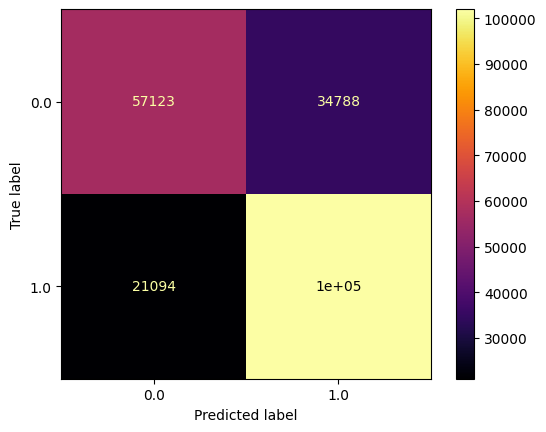

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred,cmap = 'inferno')

Precision:  0.745757509318132
Recall:  0.8286934771309772


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


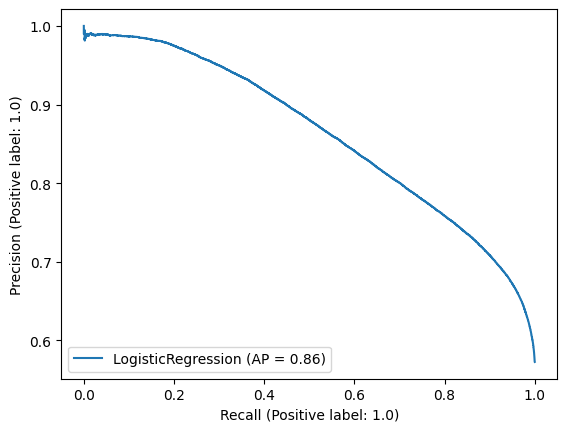

In [ ]:
#calculating precision and reall
precision = precision_score(y_test, y_test_pred)
recall = recall_score(y_test, y_test_pred)
 
print('Precision: ',precision)
print('Recall: ',recall)
 
#Plotting Precision-Recall Curve
disp = plot_precision_recall_curve(log_reg_model, X_test, y_test)

### Random Forest Classifier

In [ ]:
rf = RandomForestClassifier(max_depth = 15)

In [51]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=15)

In [52]:
rf_y_test_pred = rf.predict(X_test)

In [53]:
print('Accuracy on train data: ',accuracy_score(y_train,rf.predict(X_train)))
print('Accuracy on test data: ',accuracy_score(y_test,rf_y_test_pred))

Accuracy on train data:  0.8051892692892539
Accuracy on test data:  0.7837030974624152


##### Random forest is kind of overfitting

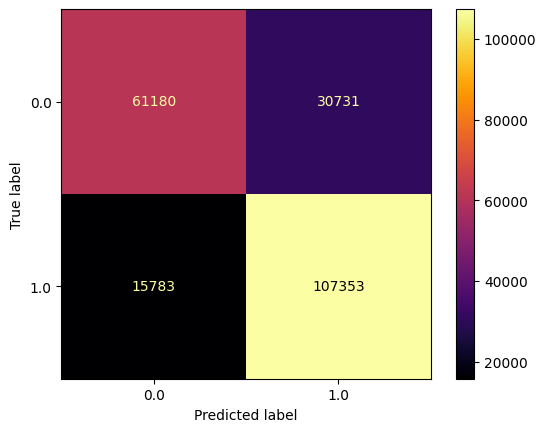

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, rf_y_test_pred,cmap = 'inferno')

##### Let's look at the feature importance plot

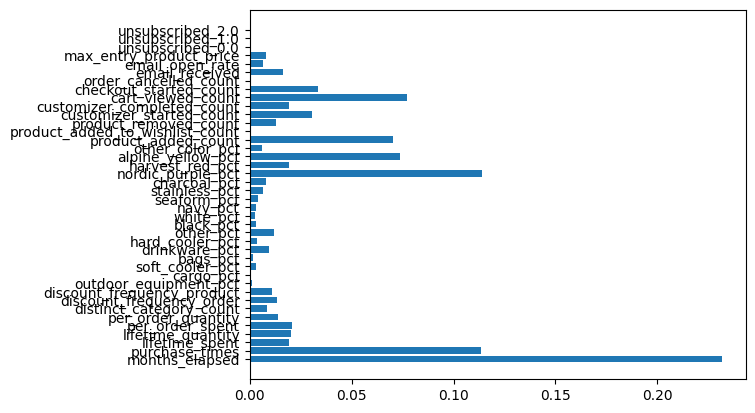

In [55]:
plt.barh(X_train.columns, rf.feature_importances_)
plt.rc('ytick', labelsize=8) 

##### Hyperparameter tuning for Random Forest

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_depth': [5,10,15,20],
}

In [ ]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid=param_grid)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)

### Decision tree classifier

In [ ]:
dt_clf_model = DecisionTreeClassifier(max_depth = 10)

In [ ]:
dt_clf_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10)

In [ ]:
dt_y_test_pred = dt_clf_model.predict(X_test)

In [ ]:
print('Accuracy on train data: ',accuracy_score(y_train,dt_clf_model.predict(X_train)))
print('Accuracy on test data: ',accuracy_score(y_test,dt_y_test_pred))

Accuracy on train data:  0.7642709555615147
Accuracy on test data:  0.7612661418201603


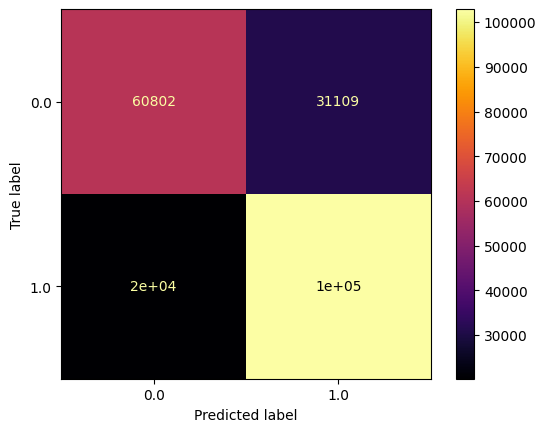

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, dt_y_test_pred,cmap = 'inferno')

In [ ]:
dt_clf_model.get_depth()

58

In [ ]:
for max_d in range(15,20):
  dt_clf_model_hp_tuning = DecisionTreeClassifier(max_depth=max_d, random_state=100)
  dt_clf_model_hp_tuning.fit(X_train, y_train)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), dt_clf_model_hp_tuning.score(X_train, y_train))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), dt_clf_model_hp_tuning.score(X_test,y_test))
  print('')


The Training Accuracy for max_depth 15 is: 0.7938103261467684
The Validation Accuracy for max_depth 15 is: 0.7777788111436105

The Training Accuracy for max_depth 16 is: 0.8013466865280195
The Validation Accuracy for max_depth 16 is: 0.7781368724046371

The Training Accuracy for max_depth 17 is: 0.81010138900299
The Validation Accuracy for max_depth 17 is: 0.7769836361353565

The Training Accuracy for max_depth 18 is: 0.8197969739854511
The Validation Accuracy for max_depth 18 is: 0.7759513036685004

The Training Accuracy for max_depth 19 is: 0.8311867675028172
The Validation Accuracy for max_depth 19 is: 0.7744725571619228



### Gradient Boosting Classifier

In [62]:
gb_clf = GradientBoostingClassifier()

In [63]:
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

In [65]:
gb_y_test_pred = gb_clf.predict(X_test)

In [66]:
print('Accuracy on train data: ',accuracy_score(y_train,gb_clf.predict(X_train)))
print('Accuracy on test data: ',accuracy_score(y_test,gb_y_test_pred))

Accuracy on train data:  0.7789577129889838
Accuracy on test data:  0.777802061874846
